# Machine Learning

***

```sh
$ conda install tensorflow
```


https://keras.io/

## Packages

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [2]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Single Neuron

***

![Neuron](img/neuron.svg)

## Single Input

***

![Single Input Neuron](img/neuron-single-input.svg)

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$

In [3]:
# Identity activation function.
def identity(x):
    return x

In [4]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [5]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [6]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [7]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [8]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 4.90724947,  8.56409794, 11.22947422, 15.71518327, 20.92433531,
       24.66846824, 28.32027399, 30.72480871, 37.7094778 , 38.48706415,
       45.5055302 , 48.62041771])

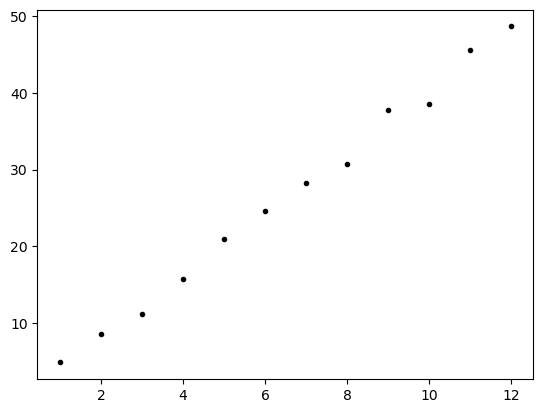

In [9]:
plt.plot(data_in, data_out, 'k.');

## Training

***

In [10]:
# An index in the data set.
i = 5

In [11]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 24.668468243358387)

In [12]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [13]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

***

In [14]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [15]:
# An index in the data set.
i = 5

In [16]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

348.5117065532806

In [17]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

0.4468497923786472

## Training

***

In [18]:
# Hyperparameter.
learning_rate = 0.001

In [19]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [20]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [21]:
# The training values.
data_in[i], data_out[i]

(6.0, 24.668468243358387)

In [22]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [23]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [24]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [25]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 4.052])

## Using keras

***

https://github.com/keras-team/keras

In [26]:
# Create a new sequential neural network.
model = keras.Sequential()

In [27]:
# Add a dense layer with 64 neurons and use the relu activation function.
model.add(keras.layers.Dense(units=64, activation='relu'))

In [28]:
# Add a dense layer with 10 neurons and the softmax activation function.
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [29]:
# Compile the neural network.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
# Create a fake training data set.
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))

In [31]:
# Train the neural network.
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 4ms/step - loss: 13.3223 - accuracy: 0.1100
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 13.2597 - accuracy: 0.1100
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1897 - accuracy: 0.1300
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 13.1428 - accuracy: 0.1300
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1052 - accuracy: 0.1300


In [32]:
# Create a fake training data set.
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [33]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 197ms/step - loss: 12.3677 - accuracy: 0.2000


In [34]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 113ms/step


In [35]:
classes

array([[0.18684046, 0.15754752, 0.1421309 , 0.07501768, 0.05010793,
        0.06489909, 0.11524478, 0.11322683, 0.04707121, 0.04791345],
       [0.2599975 , 0.05421525, 0.03765188, 0.03876377, 0.07227085,
        0.09261125, 0.18541041, 0.1143895 , 0.05596971, 0.08871985],
       [0.13714057, 0.09870123, 0.06560263, 0.12232872, 0.04418718,
        0.06918702, 0.04875948, 0.17613098, 0.09304284, 0.1449194 ],
       [0.11026949, 0.11688177, 0.03646832, 0.02114461, 0.12203204,
        0.04130483, 0.05797193, 0.19693507, 0.17252222, 0.12446968],
       [0.02667831, 0.08192836, 0.03823523, 0.03865291, 0.08093915,
        0.11714806, 0.18239816, 0.16722788, 0.08650612, 0.18028577],
       [0.0742917 , 0.0857342 , 0.2197051 , 0.0556482 , 0.07370019,
        0.04753596, 0.04548179, 0.11727536, 0.19194175, 0.08868571],
       [0.0662929 , 0.06435683, 0.0153883 , 0.01860684, 0.09808028,
        0.25866327, 0.14290364, 0.19504759, 0.01816379, 0.12249659],
       [0.10807998, 0.12971407, 0.0872926

## Single Neuron in keras

***

In [36]:
# Create a new sequential neural network.
model = keras.Sequential()

In [37]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [38]:
# Compile the neural network.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [39]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 0.01)

# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [40]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 4.00126378],
       [ 2.826377  ],
       [ 4.60106864],
       ...,
       [51.82296545],
       [52.3153027 ],
       [52.18343132]])

In [41]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 2ms/step - loss: 34.3163 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 1ms/step - loss: 1.1457 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 1ms/step - loss: 1.0925 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 1ms/step - loss: 1.1166 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 1ms/step - loss: 1.0986 - accuracy: 0.0000e+00


In [42]:
# Test input values.
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
preds = model.predict(data_test)

32/32 [==============================] - 0s 968us/step


In [43]:
data_test.flatten()[0]

-10.0

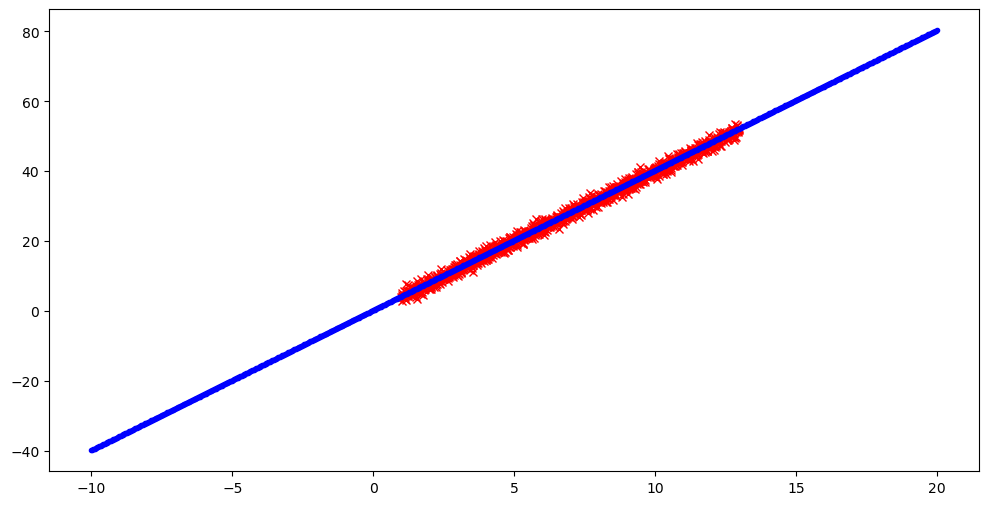

In [44]:
# Plot the values.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set.
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')

# Plot the predicted data set.
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

***

## End